# Patient Outcomes for Injectable Therapies
**(UCI Diabetes 130-US Hospitals Dataset)**

**Author:** Jyotirmoy Banerji

## 1. Load Dataset

*This cell imports necessary libraries for data manipulation, visualization, and analysis.*

In [ ]:
# ==========================================
# Patient Outcomes for Injectable Therapies
# (UCI Diabetes 130-US Hospitals Dataset)
# ==========================================

# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


*This cell loads the dataset from a CSV file and samples 5,000 rows.*

In [ ]:
# -----------------------------
# 1. Load Dataset
# -----------------------------
print("Loading dataset...")
data = pd.read_csv("/content/diabetic_data.csv")

# Keep a smaller sample (5,000 rows)
data = data.sample(n=5000, random_state=42)
print("Dataset loaded. Shape:", data.shape)

Loading dataset...
Dataset loaded. Shape: (5000, 50)


## 2. Data Cleaning

*This cell cleans the data by replacing missing values, selecting relevant columns, and removing rows with missing gender or race.*

In [ ]:
# -----------------------------
# 2. Data Cleaning
# -----------------------------
# Replace question marks with NaN
data = data.replace('?', np.nan)

# Keep useful columns for analysis
columns_needed = [
    "race", "gender", "age", "time_in_hospital",
    "num_medications", "number_inpatient", "number_outpatient",
    "number_emergency", "insulin", "diabetesMed", "change", "readmitted"
]
df = data[columns_needed]

# Remove rows with missing gender or race
df = df[df["gender"] != "Unknown/Invalid"]
df = df.dropna(subset=["race", "gender"])

print("Data cleaned. Remaining rows:", df.shape[0])


Data cleaned. Remaining rows: 4886


## 3. Create New Columns

*This cell creates new columns for readmission flag and label, and insulin usage flag.*

In [ ]:
# -----------------------------
# 3. Create New Columns (No Lambda)
# -----------------------------

# Create a numeric flag for readmission
readmit_flag = []
readmit_label = []

for value in df["readmitted"]:
    if value == "<30":
        readmit_flag.append(1)
        readmit_label.append("Readmit <30d")
    elif value == ">30":
        readmit_flag.append(1)
        readmit_label.append("Readmit >30d")
    else:
        readmit_flag.append(0)
        readmit_label.append("No Readmit")

df["readmitted_flag"] = readmit_flag
df["readmit_label"] = readmit_label

# Create a flag for insulin usage
insulin_flag = []

for value in df["insulin"]:
    if value.lower() == "no" or value.lower() == "none":
        insulin_flag.append(0)
    else:
        insulin_flag.append(1)

df["insulin_flag"] = insulin_flag

print("New columns created.")

New columns created.


## 4. Basic Summary

*This cell provides a basic summary of the data, including data types, sample rows, and overall readmission rate.*

In [ ]:
# -----------------------------
# 4. Basic Summary
# -----------------------------
print("\nBasic Information:")
print(df.info())
print("\nSample Data:")
print(df.head())

readmission_rate = (df["readmitted_flag"].mean()) * 100
print(f"\nOverall readmission rate: {readmission_rate:.2f}%")



Basic Information:
<class 'pandas.core.frame.DataFrame'>
Index: 4886 entries, 35956 to 31470
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   race               4886 non-null   object
 1   gender             4886 non-null   object
 2   age                4886 non-null   object
 3   time_in_hospital   4886 non-null   int64 
 4   num_medications    4886 non-null   int64 
 5   number_inpatient   4886 non-null   int64 
 6   number_outpatient  4886 non-null   int64 
 7   number_emergency   4886 non-null   int64 
 8   insulin            4886 non-null   object
 9   diabetesMed        4886 non-null   object
 10  change             4886 non-null   object
 11  readmitted         4886 non-null   object
 12  readmitted_flag    4886 non-null   int64 
 13  readmit_label      4886 non-null   object
 14  insulin_flag       4886 non-null   int64 
dtypes: int64(7), object(8)
memory usage: 610.8+ KB
None

Sample Data:
   

## 5. Visual Analysis

*This cell generates bar charts and interactive plots to visualize the relationship between different variables and readmission.*

/tmp/ipython-input-2446481898.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="insulin", y="readmitted_flag", data=df, ci=None)


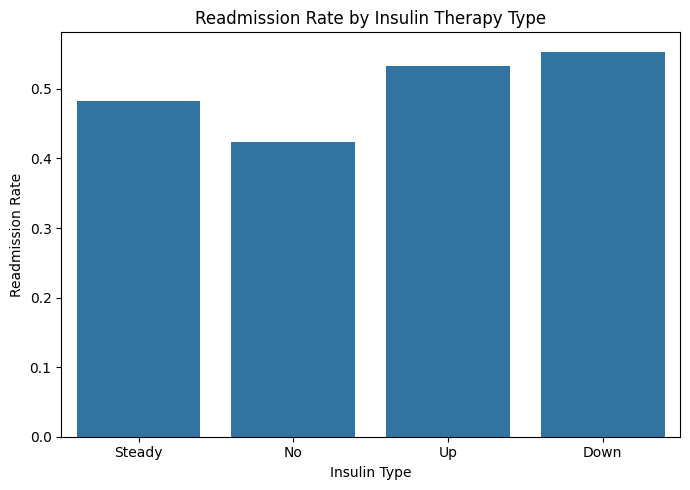

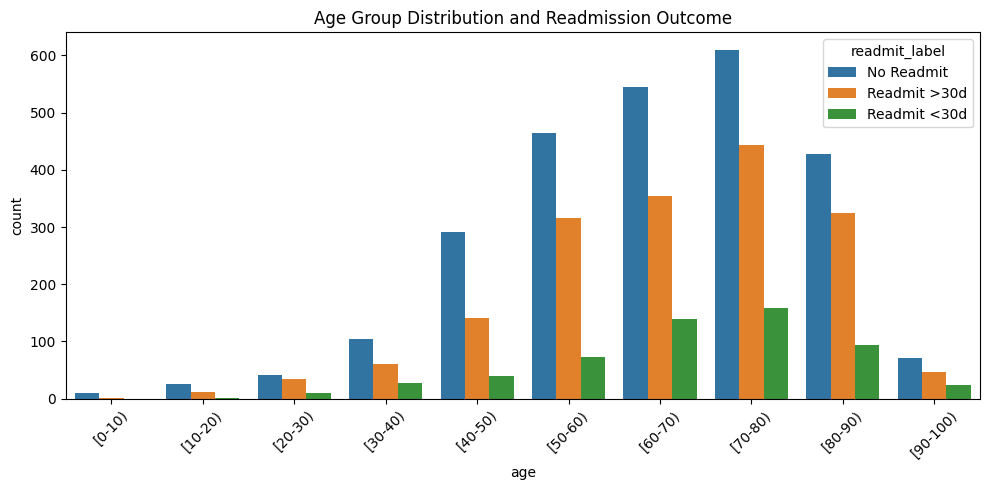

In [ ]:
# -----------------------------
# 5. Visual Analysis
# -----------------------------

# Bar chart: Readmission by Insulin Type
plt.figure(figsize=(7,5))
sns.barplot(x="insulin", y="readmitted_flag", data=df, ci=None)
plt.title("Readmission Rate by Insulin Therapy Type")
plt.ylabel("Readmission Rate")
plt.xlabel("Insulin Type")
plt.tight_layout()
plt.show()

# Countplot: Age vs Readmission Label
plt.figure(figsize=(10,5))
sns.countplot(x="age", hue="readmit_label", data=df,
              order=sorted(df["age"].unique()))
plt.title("Age Group Distribution and Readmission Outcome")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Interactive Plot: Medications vs Readmission
fig = px.histogram(
    df,
    x="num_medications",
    color="readmit_label",
    title="Number of Medications vs Readmission Outcome",
    nbins=30
)
fig.show()

## 6. Statistical Summary

*This cell calculates and prints the average hospital stay based on insulin usage.*

In [ ]:
# -----------------------------
# 6. Statistical Summary
# -----------------------------
average_stay = df.groupby("insulin_flag")["time_in_hospital"].mean()
print("\nAverage hospital stay by insulin usage:")
print(average_stay)


Average hospital stay by insulin usage:
insulin_flag
0    4.042996
1    4.664639
Name: time_in_hospital, dtype: float64


## 7. Export Summary for Dashboard


*This cell groups the data and exports a summary to a CSV file for Dashboard.*

In [ ]:
# -----------------------------
# 7. Export Summary for Dashboard
# -----------------------------
summary = df.groupby(["age", "gender", "insulin", "readmit_label"]).size().reset_index(name="Count")
summary.to_csv("diabetes_summary_for_powerbi.csv", index=False)

print("\n✅ File saved: 'diabetes_summary_for_powerbi.csv'")
print("You can now import this file into Power BI for dashboard creation.")


✅ File saved: 'diabetes_summary_for_powerbi.csv'
You can now import this file into Power BI for dashboard creation.
